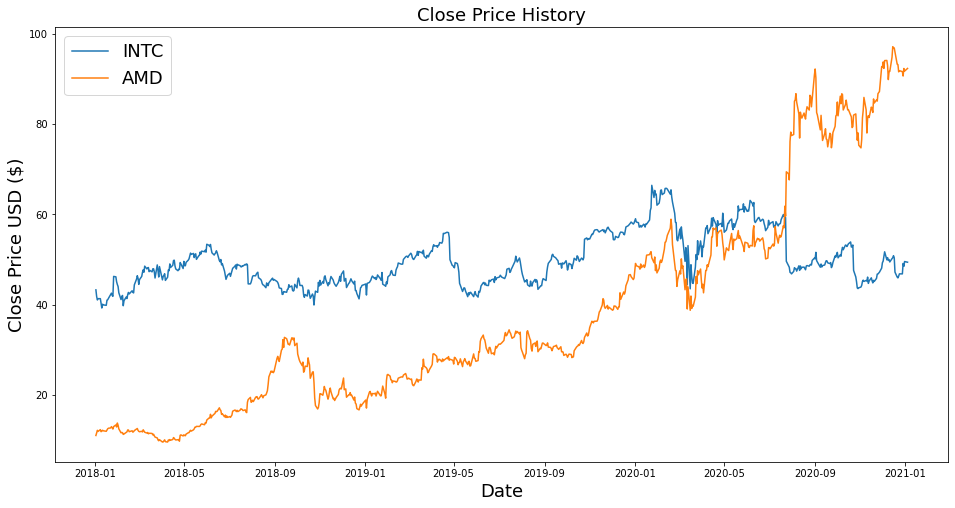

In [2]:
import numpy as np
import pandas_datareader as pdr
from datetime import datetime
import matplotlib.pyplot as plt

def GBMsimulator(seed, So, mu, sigma, Cov, T, N):
   
    np.random.seed(seed)
    dim = np.size(So)
    t = np.linspace(0., T, int(N))
    A = np.linalg.cholesky(Cov)
    S = np.zeros([dim, int(N)])
    S[:, 0] = So
    for i in range(1, int(N)):    
        drift = (mu - 0.5 * sigma**2) * (t[i] - t[i-1])
        Z = np.random.normal(0., 1., dim)
        diffusion = np.matmul(A, Z) * (np.sqrt(t[i] - t[i-1]))
        S[:, i] = S[:, i-1]*np.exp(drift + diffusion)
    return S, t

intc = pdr.get_data_yahoo(symbols='INTC', start=datetime(2018, 1, 1), end=datetime(2021, 1, 4))
amd = pdr.get_data_yahoo(symbols='AMD', start=datetime(2018, 1, 1), end=datetime(2021, 1, 4))

plt.figure(figsize = (16,8))
plt.title('Close Price History', fontsize = 18)
plt.plot(intc['Adj Close'])
plt.plot(amd['Adj Close'])
plt.legend(['INTC', 'AMD'], loc = 'upper left', fontsize = 18)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show()
